In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

from IPython import get_ipython
get_ipython().Completer.use_jedi = True  # Jedi engine provides smarter completions

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt # visualization
import seaborn as sns  #visualization
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/drug-python-training-csv/Drug.csv


In [2]:
def greet(name):
    """This function greets the person passed in as a parameter."""
    print("Hello, " + name + "!")
    print(greet.__doc__)

#(question): what is the diffrence of quotes in python : 
#I search about the diffrence between triple quotes ,double quotes, quotes 
#(answer) i understand that triple quotes are for multiple lines.

In [3]:
#Variables and data types: 

x = 5
y = 2.5

result = x + y 

print(result)
print(type(x))
print(type(y))
print(type(result))

7.5
<class 'int'>
<class 'float'>
<class 'float'>


In [4]:
greeting = "hello"
name = 'aryan'

message = greeting + ", " +  name
print(message)
print(type(greeting))
print(type(name))
print(type(message))

a = 777
a = str(a)
str_int = message + a 
print(str_int)



hello, aryan
<class 'str'>
<class 'str'>
<class 'str'>
hello, aryan777


In [5]:
# list : 
my_list = [7, 2, 3.14, 'aryan' , 'python', [77, 63]]
print(my_list)
print(my_list[3])
print(my_list[-1])

print("type of my_list is : ", type(my_list))
print(f'type of first elemnt is {type(my_list[0])} and type of forth elemnet is {type(my_list[3])}')

[7, 2, 3.14, 'aryan', 'python', [77, 63]]
aryan
[77, 63]
type of my_list is :  <class 'list'>
type of first elemnt is <class 'int'> and type of forth elemnet is <class 'str'>


In [6]:
 #if statment 

drug = 'drug Y'

if drug == 'drug Y' :
    print(f'{drug} is prescribed for colds!')

print("next statment")

drug Y is prescribed for colds!
next statment


In [7]:
drug = 'drug C'

if drug == 'drug Y':
    print(f'{drug} is precribed for colds!')

print('next statment ...')

next statment ...


In [8]:
 ## if .. else statment 

drug = 'drug Y'

if drug == 'drug Y' :
    print(f'{drug} is prescribed for colds!')

else: 
    print(f'{drug} is prescribed for headache')

print('next statment')

drug Y is prescribed for colds!
next statment


In [9]:
#elif .. else statment 

drug = 'drug X'

if drug == 'drug Y' :
    print(f'{drug} is prescribed for colds!')
elif drug == 'drug X':
    print(f'{drug} is prescribed for flu')
elif drug == 'drug Z':
    print(f'{drug} is prescribed for covid-19')

else: 
    print(f'{drug} is prescribed for headache')

print('next statment')  

drug X is prescribed for flu
next statment


In [10]:
# for loops 

# Exercise: convert characters of a string to opposite case 
my_string = 'dayche knows data psychology'

print("old statement:", my_string)

new_string = ''

for char in my_string:
    if char.isupper():
        new_string += char.lower()
    elif char.islower():
        new_string += char.upper()
    else:
        new_string += char   # keep spaces or other characters unchanged

print("new statement:", new_string)


old statement: dayche knows data psychology
new statement: DAYCHE KNOWS DATA PSYCHOLOGY


In [11]:
# create a dataframe from a dictionary 

data = {
    'Name' : ['Jina', 'Yalda', 'Kian', 'Nika', 'Javad', 'Hasti', 'Siavash'] ,
    'Age' : [22, 9, 16, 22, 7, 17, 20],
    'State' : ['Kordestan' , 'Tehran', 'Mazandaran', 'Lorestan', 'Guilan', 'Shiraz', 'Esfehan']
}

type(data)
df = pd.DataFrame(data)
df
type(df)

pandas.core.frame.DataFrame

In [12]:
# Read data from a csv file 
df = pd.read_csv('/kaggle/input/drug-python-training-csv/Drug.csv')

df.head()
df.tail()


,Age,Sex,BP,Cholesterol,Na,K,Drug
195,56,F,LOW,HIGH,0.848774,0.073380,drugC
196,16,M,LOW,HIGH,0.743021,0.061886,drugC
197,52,M,NORMAL,HIGH,0.549945,0.055581,drugX
198,23,M,NORMAL,NORMAL,0.784520,0.055959,drugX
199,40,F,LOW,NORMAL,0.683503,0.060226,drugX


In [13]:
# Get information about data types.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na           200 non-null    float64
 5   K            200 non-null    float64
 6   Drug         200 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 11.1+ KB


In [14]:
#Create a datafram with missing values 

data = {'A' : [1, 2, None, 5],
        'B' : [5, None, 7, 9]}

datadf = pd.DataFrame(data)
datadf

#Detect missing values

missing_data = datadf.isna()
print("Missing values(T/F) :\n" , missing_data)


#Create a mask for missing values

mask = datadf.mask(missing_data , 'missing')

print("\nMasked DataFrame:\n" , mask)

Missing values(T/F) :
        A      B
0  False  False
1  False   True
2   True  False
3  False  False

Masked DataFrame:
          A        B
0      1.0      5.0
1      2.0  missing
2  missing      7.0
3      5.0      9.0


In [15]:
# Select the one or more columns

demo1 = df.Age # or df[Age]

demo2 = df[['Age', 'Sex', 'BP']]

In [16]:
# Filter rows where age is greater than 30 and bloos pressure is high.
df_filtered = df[(df['Age'] > 30 ) & (df.BP == 'HIGH')]
df_filtered.shape


#sort by 'Age' and "Na" in different order.
df_sorted1 =  df.sort_values(by='Age', ascending=True)
df_sorted2 = df.sort_values(by=['Age', 'Na'], ascending=[True, False])

In [17]:
# Create ID to column in DataFrame with list comprehension 
df['ID'] = [f'Patient-{i+1}' for i in range(df.shape[0])]
df.set_index('ID', inplace=True)




# Using .loc[] for label-based indexing
# Select a single cell by label

cell_value_loc = df.loc['Patient-7', 'Age']
print("Singel cell:" , cell_value_loc)
print('=' * 30)

# Select a single row by label 
row_loc = df.loc['Patient-17']
print("Single row:", row_loc)
print('=' * 30)


# Select multiple rows and specific columns by lable 
subset_loc = df.loc[['Patient-17', 'Patient-7'], ['Sex', 'Drug']]
#subset_loc.shape
print("Subset:" , subset_loc)
print('=' * 100)



# Using .iloc[] for position-based indexing

# Select a singel cell by position

cell_value_iloc = df.iloc[1, 1]
print("Singel cell:" , cell_value_iloc)
print('=' * 30)



# Select a single row by position 

row_iloc = df.iloc[2]
print("Single row:", row_iloc)
print('=' * 30)

# Select multiple rows and specific columns by position\

subset_iloc = df.iloc[[0, 3], [0, 2]]
print("Subset iloc:", subset_iloc)
print('=' * 30)



Singel cell: 49
Single row: Age                  69
Sex                   M
BP                  LOW
Cholesterol      NORMAL
Na             0.848948
K              0.074111
Drug              drugX
Name: Patient-17, dtype: object
Subset:            Sex   Drug
ID                   
Patient-17   M  drugX
Patient-7    F  drugY
Singel cell: M
Single row: Age                  47
Sex                   M
BP                  LOW
Cholesterol        HIGH
Na             0.697269
K              0.068944
Drug              drugC
Name: Patient-3, dtype: object
Subset iloc:            Age      BP
ID                    
Patient-1   23    HIGH
Patient-4   28  NORMAL


In [18]:
# Apply a function to a column 
df['Na_Square'] = df['Na'].apply(lambda x: x ** 2)

# Apply a function to df

df['Ratio'] = df.apply(lambda x: x['Na']/x['K'], axis=1)

# Save to a CSV file
df.to_csv('NewData.csv' , index=True)



In [19]:
# Create a 1D NumPy array (vector)
arr1d = np.array([1, 2, 3, 4])
print('My vector :' , arr1d)
print('=' * 50)

# Create a 2D NumPy array (Matrix)

arr2d = np.array([[1, 2, 3, 4],
                [5, 6, 7, 8],
                [9, 10, 11, 12]])

print("My Matrix :" , arr2d)
print('=' * 50)

# Create a 3D NumPY array 
arr3d = np.array (([[[1, 2, 3, 4,],
                  [5, 6, 7, 8],
                  [9, 10, 11, 12]],
                  [[13, 14, 15,16],
                  [17, 18, 19, 20],
                  [21, 22, 23, 24]]]))
print("My 3D array :" , arr3d)



My vector : [1 2 3 4]
My Matrix : [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
My 3D array : [[[ 1  2  3  4]
  [ 5  6  7  8]
  [ 9 10 11 12]]

 [[13 14 15 16]
  [17 18 19 20]
  [21 22 23 24]]]


In [20]:
#NumPy arrays have several attributes, including shape, dtype, and size.

print(arr3d.shape)

print(f'First Dim is {arr3d.shape[0]}, Second Dim is {arr3d.shape[1]} and Third Dim is {arr3d.shape[2]} ')

print(arr3d.dtype)

print(arr3d.size)


(2, 3, 4)
First Dim is 2, Second Dim is 3 and Third Dim is 4 
int64
24


In [21]:
data_list = [(i+1)**2 for i in range(100)]

data_arr = np.array(data_list)
data_arr.dtype

# data_arr8 = np.array(data_list, dtype='int8') ========> In the new version of NumPy it shows overflow byts error

data_arr16 = data_arr.astype('int16')

#=====================================================================#

#Reshape array 
data_list = [i+1 for i in range (50)]
data_arr = np.array(data_list)

new_arr1 = np.reshape(data_arr, (10, 5), order='C')
new_arr2 = data_arr.reshape((5, 10), order='F')

In [22]:
print("data_arr:" , data_arr)
element = data_arr[7]
subarray = data_arr[2:17]

print("new_arr1 :" , new_arr1)
element = new_arr1[7, 1]
subarray = new_arr1[2:5, 1:3]
subrow = new_arr1[:2, :]
subcol = new_arr1[:, 3:]

data_arr: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]
new_arr1 : [[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]
 [31 32 33 34 35]
 [36 37 38 39 40]
 [41 42 43 44 45]
 [46 47 48 49 50]]


In [23]:
###########################################
## Array Transformation Based on Indices ##
###########################################

new_arr = np.random.rand(5, 5)

print(new_arr)
print("*"*50)

for i in range(new_arr.shape[0]):
    for j in range(new_arr.shape[1]):
        if i < j :
            new_arr[i, j] = np.std(new_arr[:, j])
        elif i > j:
            new_arr[i, j] = np.sum(new_arr[i, :])
        else: 
            new_arr[i, j] = 0

print(new_arr)

[[0.70104873 0.59673803 0.24209661 0.46084412 0.18069878]
 [0.85722093 0.69028533 0.53361307 0.40568135 0.32056774]
 [0.24305733 0.6258426  0.16159277 0.74866151 0.21357344]
 [0.23395457 0.06282878 0.8795953  0.6756847  0.10552432]
 [0.02070261 0.55774321 0.29107048 0.88910207 0.12744557]]
**************************************************
[[ 0.          0.22611168  0.26044954  0.18003022  0.07581345]
 [ 2.80736843  0.          0.25801189  0.25436549  0.08876754]
 [ 1.99272765  3.74239797  0.          0.28090202  0.0488347 ]
 [ 1.95758766  3.68122076  7.29961273  0.          0.02660046]
 [ 1.88606393  3.75142524  6.94510728 13.59914407  0.        ]]


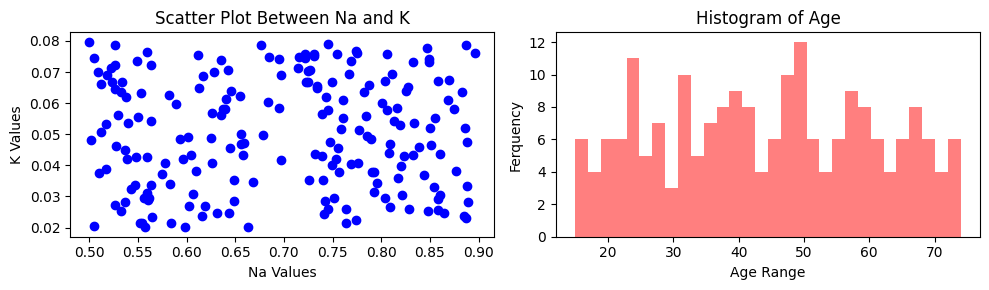

<Figure size 640x480 with 0 Axes>

In [24]:
#Matplotlib

Na = df.Na
K = df.K
Age = df.Age

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))

# Scatter plot

axes[0].scatter(Na, K, color='b', marker='o')
axes[0].set_title('Scatter Plot Between Na and K')
axes[0].set_xlabel('Na Values')
axes[0].set_ylabel('K Values')

# Histogram
axes[1].hist(Age, bins=30, color='r', alpha=0.5)
axes[1].set_title('Histogram of Age')
axes[1].set_xlabel('Age Range')
axes[1].set_ylabel('Ferquency')

#Adjust layout
plt.tight_layout()

# Show the figure
plt.show()
plt.savefig("plot")

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

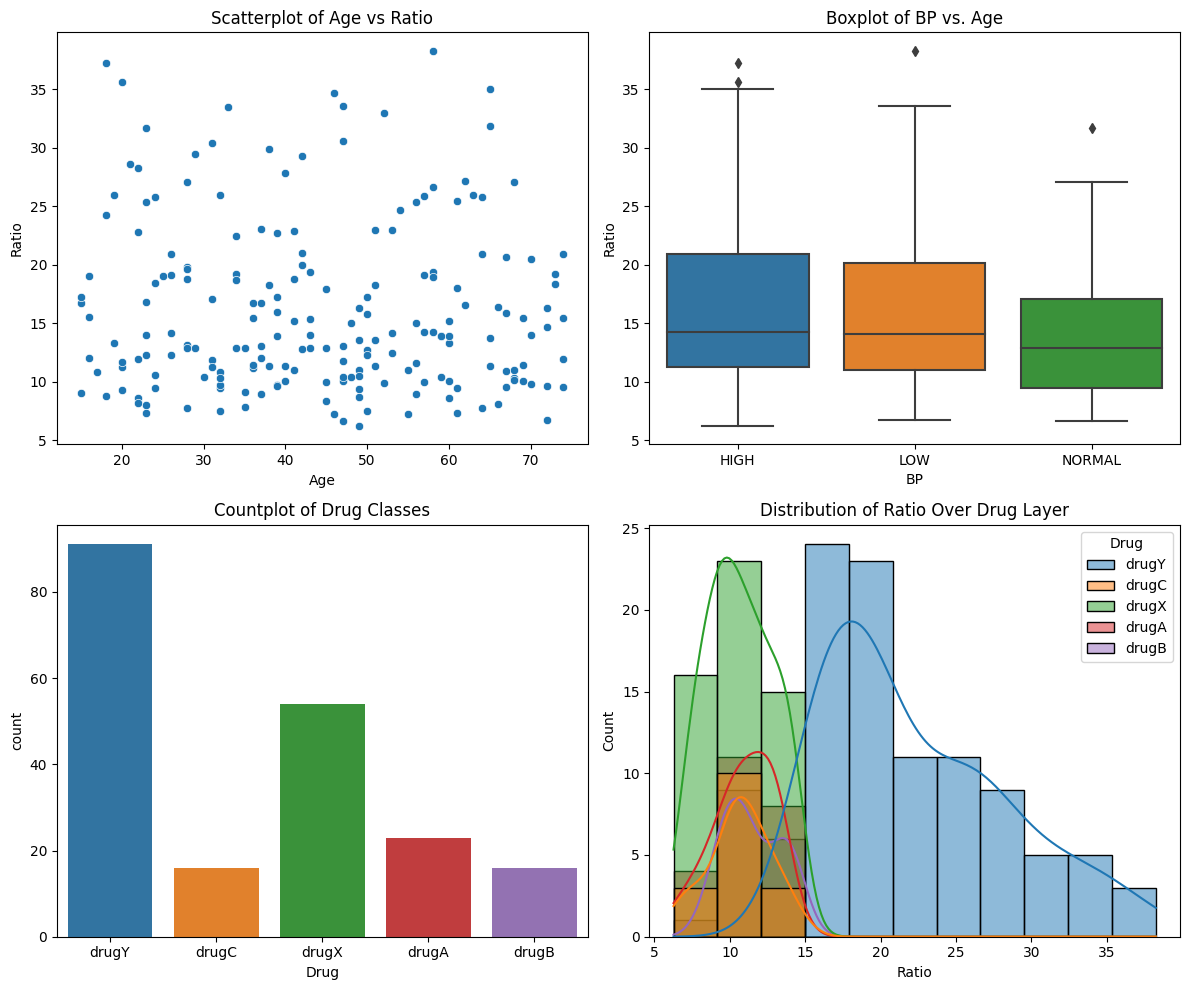

In [25]:
# Seaborn 
Na = df.Na
K = df.K
Age = df.Age
Ratio = df.Ratio

# Create a 2x2 layout for plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))

#Plot 1 : Scatterplot of Age vs. Ratio
sns.scatterplot(x='Age', y='Ratio', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Scatterplot of Age vs Ratio')


#Plot 2 : Boxplot of BP vs. Age
sns.boxplot(x='BP', y='Ratio', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of BP vs. Age')

#Plot 3: Countplot of Drug Classes
sns.countplot(x='Drug', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Countplot of Drug Classes')

#Plot 4: Distribution of Ratio Over Druc Layer

sns.histplot(data=df, x='Ratio', hue='Drug', kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Ratio Over Drug Layer')

#Adjust Layout

plt.tight_layout()

#Show the plots
plt.show()

In [26]:
# Encoding categorical variables (BP and Drug)
label_encoder = LabelEncoder()
df['BP'] = label_encoder.fit_transform(df['BP'])
df['Drug'] = label_encoder.fit_transform(df['Drug'])